In [144]:
#imports
from sympy import symbols, linsolve, Matrix
import numpy as np
import itertools
import functools
import matplotlib.pyplot as plt


In [3]:
#symbols
p_Rp  , p_Rs  , p_Kl  , p_Kr  = symbols( ' p_Rp  p_Rs  p_Kl  p_Kr ' )
p_Csa , p_Csv , p_Cpa , p_Cpv = symbols( ' p_Csa p_Csv p_Cpa p_Cpv' )

v_Vsa , v_Vsv , v_Vpa , v_Vpv = symbols( ' v_Vsa v_Vsv v_Vpa v_Vpv' )
v_Psa , v_Psv , v_Ppa , v_Ppv = symbols( ' v_Psa v_Psv v_Ppa v_Ppv' )

v_Q , p_Vo = symbols( 'v_Q p_Vo' )

#param values
    #L
pval_Vo  = 5    #L
    # mmHg / (L*m)
pval_Rs  = 17.5 
pval_Rp  = 1.79 
    #L/(m*mmHg)
pval_Kr  = 2.8
pval_Kl  = 1.12
    #L/mmHg
pval_Csa = 0.01
pval_Csv = 1.75
pval_Cpa = 0.00667
pval_Cpv = 0.08

In [4]:
p_vars = [ 'Vo' ,  'Rp'  , 'Rs'  , 'Kl'  , 'Kr' , 'Csa' , 'Csv' , 'Cpa' , 'Cpv' ]

evx = lambda x: eval (x)
params  = [ evx('p_'+x) for x in p_vars]
parvals = [ evx('pval_'+x) for x in p_vars]
subDict = dict(zip (params , parvals) ) #substitution dictionary

v_vars = [v_Vsa , v_Vsv , v_Vpa , v_Vpv, v_Psa , v_Psv , v_Ppa , v_Ppv, v_Q]



In [5]:
#ecs and substitution
eq1 = v_Q/p_Kr              - v_Psv
eq2 = v_Q/p_Kl              - v_Ppv
eq3 = v_Q/p_Kr + p_Rs * v_Q - v_Psa
eq4 = v_Q/p_Kl + p_Rp * v_Q - v_Ppa
eq5 = v_Q * p_Csv/p_Kr      - v_Vsv
eq6 = v_Q * p_Cpv/p_Kl      - v_Vpv
eq7 = v_Q * (p_Csa / p_Kr  + p_Csa * p_Rs ) - v_Vsa
eq8 = v_Q * (p_Cpa / p_Kl  + p_Cpa * p_Rp ) - v_Vpa
eq9 = v_Vsa + v_Vsv + v_Vpa + v_Vpv - p_Vo



In [113]:
f_sub = lambda f,subDict : f.subs(subDict)
f_sub_aux = lambda fs,subDict : map(f_sub ,fs , itertools.repeat(subDict))

ecs = [ eq1 , eq2 , eq3 , eq4 , eq5 , eq6 , eq7 , eq8 , eq9 ]

ecs_subs = list(map( functools.partial(f_sub,subDict = subDict), ecs))


In [42]:
ecs_subs

[-v_Psv + 0.357142857142857*v_Q,
 -v_Ppv + 0.892857142857143*v_Q,
 -v_Psa + 17.8571428571429*v_Q,
 -v_Ppa + 2.68285714285714*v_Q,
 0.625*v_Q - v_Vsv,
 0.0714285714285714*v_Q - v_Vpv,
 0.178571428571429*v_Q - v_Vsa,
 0.0178946571428571*v_Q - v_Vpa,
 v_Vpa + v_Vpv + v_Vsa + v_Vsv - 5]

#### Ejecutar linsolve
se pasan el sistema de ecuaciones con las sustituciones (*ecs_subs*) y las variables como símbolos (*v_vars*) y se obtiene una única solución


In [14]:
#list(zip(itertools.repeat( v_vars) , 
list(zip(v_vars, *linsolve(ecs_subs , v_vars) ))
# ))

[(v_Vsa, 0.999957985765270),
 (v_Vsv, 3.49985295017845),
 (v_Vpa, 0.100205869750177),
 (v_Vpv, 0.399983194306108),
 (v_Psa, 99.9957985765270),
 (v_Psv, 1.99991597153054),
 (v_Ppa, 15.0233687781374),
 (v_Ppv, 4.99978992882635),
 (v_Q, 5.59976472028551)]

#### Analísis de sensibilidad de Q respecto a los 9 parámetros

In [69]:
parvalsm = [0.9*x for x in parvals]
parvalsM = [1.1*x for x in parvals]
parvalIntervals = zip(parvalsm,parvalsM)
parLinspace = map(lambda i : np.linspace(*i, 10) , parvalIntervals  )
sakuya = {x:y for x,y in zip(params , parLinspace) } #dict relating param symbol : array of value
#def varParamQ( param , values ):
#from previous ecs returns list of Q values associated to param




In [79]:
#update base vals -> vals
#evaluate Q for param 0 with value 1
map()
auxDicc = {**subDict , params[0]:sakuya[params[0]][1]}
ecs_aux = list(map( functools.partial( f_sub , subDict = auxDicc) , ecs ))
solution, = linsolve( ecs_aux ,v_vars)
solution[8] #this is Q

5.16422746426331

In [142]:
def param2Q( p_sym ):
    auxDiccs = map(lambda v :  {**subDict , p_sym:v} , sakuya[p_sym])
    aux_ecs = map( f_sub_aux , itertools.repeat(ecs) , auxDiccs )
    #aux_ecs = list(map( functools.partial( f_sub , subDict = auxDicc) , ecs ))
#    print(list(k) for k in (aux_ecs))
    solutions = map ( lambda ec : linsolve(list(ec), v_vars) , aux_ecs )
    return list(map(lambda s : list(s)[0][8] , solutions) )#this is Q_{p,v}


param2Q(params[0])
sensibility_data = {x:y for x,y in zip(params, map(param2Q , params))}


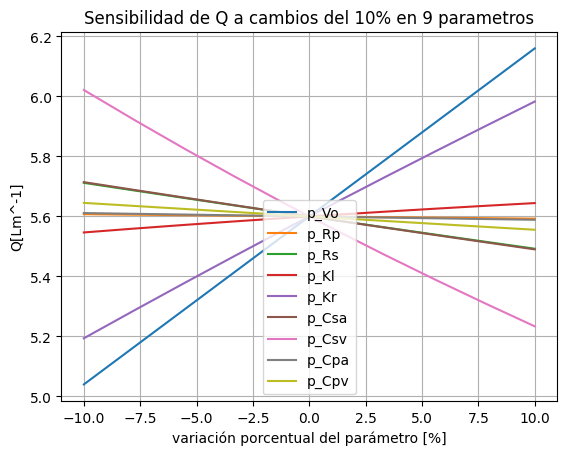

In [183]:
xval = np.linspace(-10,10, 10)

fig = plt.subplot(111)
plt.title('Sensibilidad de Q a cambios del 10% en 9 parametros')
plt.grid(visible=True)
fig.set_ylabel("Q[Lm^-1]")
fig.set_xlabel("variación porcentual del parámetro [%]")
list(map(lambda yval : plt.plot( xval ,yval) ,(sensibility_data.values())))
plt.legend(params,loc=8)
#plt.savefig("sensibilidad Q")
plt.show()



#sensibility_data



In [181]:
#auxDicc
#ecs_aux
#sakuya
#list(map(lambda v :  {**subDict , params[0]:v} , sakuya[params[0]]))
sensibility_data

{p_Vo: [5.03978824825696,
  5.16422746426331,
  5.28866668026965,
  5.41310589627600,
  5.53754511228234,
  5.66198432828868,
  5.78642354429503,
  5.91086276030137,
  6.03530197630772,
  6.15974119231406],
 p_Rp: [5.60726244557493,
  5.60559454978456,
  5.60392764593960,
  5.60226173315542,
  5.60059681054841,
  5.59893287723604,
  5.59726993233681,
  5.59560797497027,
  5.59394700425702,
  5.59228701931870],
 p_Rs: [5.71170952347273,
  5.68644781602621,
  5.66140857923098,
  5.63658888714399,
  5.61198586490770,
  5.58759668764004,
  5.56341857935320,
  5.53944881190025,
  5.51568470394906,
  5.49212361998233],
 p_Kl: [5.54635556027929,
  5.55913185277200,
  5.57136180029603,
  5.58307971377815,
  5.59431709004737,
  5.60510289454481,
  5.61546381062307,
  5.62542445995242,
  5.63500759786664,
  5.64423428691098],
 p_Kr: [5.19353216168325,
  5.28593356173101,
  5.37709892051513,
  5.46705287479417,
  5.55581941090202,
  5.64342188607169,
  5.72988304892554,
  5.81522505917000,
  5.89